In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [101]:
df = pd.read_csv('cleaned_data.csv')
df

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,days,Age
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,0,3,11,1,3463,64
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,3,11,0,2617,67
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,3,11,0,2964,56
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,3,11,0,2557,37
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,0,3,11,0,2813,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1943,Graduation,Married,34421.0,1,0,81,3,3,7,6,...,0,0,0,0,0,3,11,0,3190,47
1944,PhD,Together,64014.0,2,1,56,406,0,30,0,...,0,0,1,0,0,3,11,0,2553,75
1945,Graduation,Divorced,56981.0,0,0,91,908,48,217,32,...,1,0,0,0,0,3,11,0,2807,40
1946,Master,Together,69245.0,0,1,8,428,30,214,80,...,0,0,0,0,0,3,11,0,2808,65


Steps
1. One Hot Encoding
2. Scaling
3. Clustering
4. Cross Validation

In [102]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans,DBSCAN
from sklearn.pipeline import make_pipeline


In [103]:
ct = make_column_transformer(
    (OneHotEncoder(),['Education','Marital_Status']),
    remainder='passthrough'
)

In [104]:
min_max_sc = MinMaxScaler()

In [105]:
wcss = []
for i in range(1,20):
    k_mean = KMeans(n_clusters=i)
    k_mean_pipe = make_pipeline(ct,min_max_sc,k_mean)
    k_mean_pipe.fit_predict(df)
    wcss.append(k_mean.inertia_)

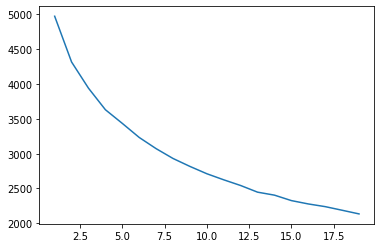

In [106]:
plt.plot(range(1,20),wcss)

In [128]:
feed = ct.fit_transform(df)

In [129]:
feed=min_max_sc.fit_transform(feed)

In [130]:
feed

array([[0.        , 0.        , 1.        , ..., 0.91345249, 0.37864078,
        0.25      ],
       [0.        , 0.        , 1.        , ..., 0.11759172, 0.40776699,
        0.25      ],
       [0.        , 0.        , 1.        , ..., 0.44402634, 0.30097087,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.29633114, 0.14563107,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.29727187, 0.38834951,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.73565381, 0.40776699,
        0.5       ]])

In [131]:
KMeans(n_clusters=5,random_state=42).fit_predict(feed)

array([2, 2, 3, ..., 3, 1, 4], dtype=int32)

In [30]:
wc = []
for i in range(1,20):
    k_mean = KMeans(n_clusters=i)
    k_mean.fit_predict(feed)
    wc.append(k_mean.inertia_)

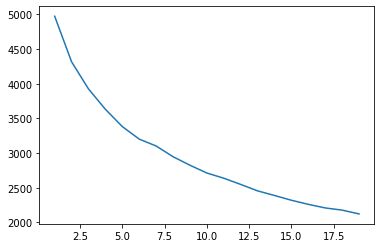

In [31]:
plt.plot(range(1,20),wc)

In [205]:
k_mean = KMeans(n_clusters=8,random_state=42)
k_mean_pipe = make_pipeline(ct,min_max_sc,k_mean)
df['catergory']=k_mean_pipe.fit_predict(df)

In [206]:
df

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,days,Age,catergory
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,3,11,1,3463,64,3
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,3,11,0,2617,67,3
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,3,11,0,2964,56,5
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,3,11,0,2557,37,5
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,3,11,0,2813,40,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1943,Graduation,Married,34421.0,1,0,81,3,3,7,6,...,0,0,0,0,3,11,0,3190,47,1
1944,PhD,Together,64014.0,2,1,56,406,0,30,0,...,0,1,0,0,3,11,0,2553,75,2
1945,Graduation,Divorced,56981.0,0,0,91,908,48,217,32,...,0,0,0,0,3,11,0,2807,40,7
1946,Master,Together,69245.0,0,1,8,428,30,214,80,...,0,0,0,0,3,11,0,2808,65,4


In [212]:
cat_0 = df[df['catergory']==0]
cat_1 = df[df['catergory']==1]
cat_2 = df[df['catergory']==2]
cat_3 = df[df['catergory']==3]
cat_4 = df[df['catergory']==4]
cat_5 = df[df['catergory']==5]
cat_6 = df[df['catergory']==6]
cat_7 = df[df['catergory']==7]

In [207]:
a =0
col_ind = []
for i in df.columns:
    print(i,a)
    col_ind.append(a)
    a += 1
col_ind

Education 0
Marital_Status 1
Income 2
Kidhome 3
Teenhome 4
Recency 5
MntWines 6
MntFruits 7
MntMeatProducts 8
MntFishProducts 9
MntSweetProducts 10
MntGoldProds 11
NumDealsPurchases 12
NumWebPurchases 13
NumCatalogPurchases 14
NumStorePurchases 15
NumWebVisitsMonth 16
AcceptedCmp3 17
AcceptedCmp4 18
AcceptedCmp5 19
AcceptedCmp1 20
AcceptedCmp2 21
Complain 22
Z_CostContact 23
Z_Revenue 24
Response 25
days 26
Age 27
catergory 28


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28]

In [209]:
u_labels=df['catergory'].unique()
u_labels

array([3, 5, 2, 4, 7, 1, 6, 0], dtype=int32)

In [213]:
print(cat_0.shape)
print(cat_1.shape)
print(cat_2.shape)
print(cat_3.shape)
print(cat_4.shape)
print(cat_5.shape)
print(cat_6.shape)
print(cat_7.shape)

(200, 29)
(370, 29)
(247, 29)
(262, 29)
(209, 29)
(295, 29)
(213, 29)
(152, 29)


In [179]:
feature_1,feature_2 = 0,1

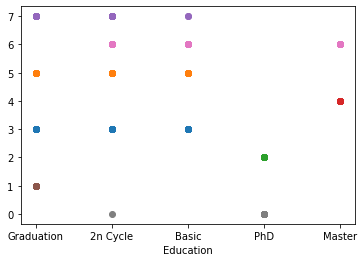

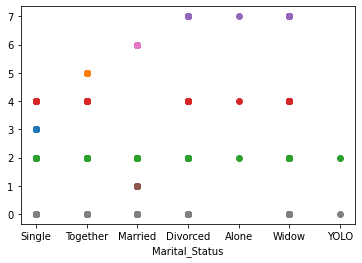

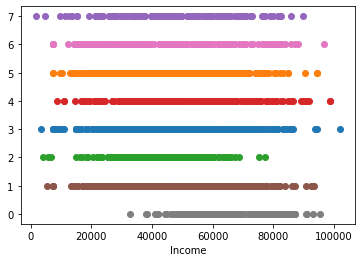

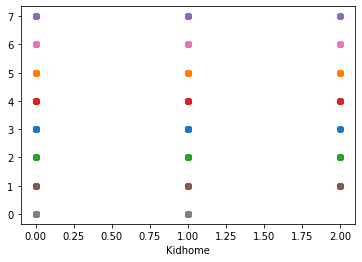

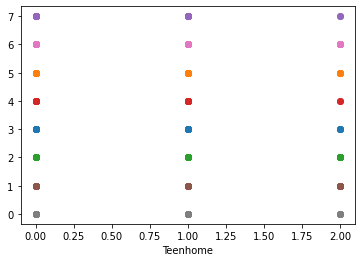

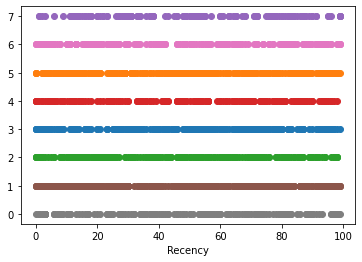

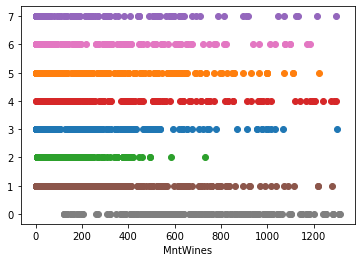

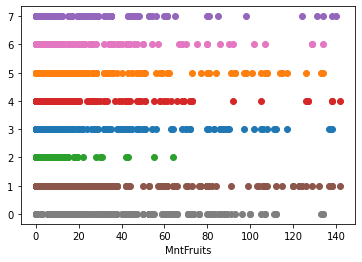

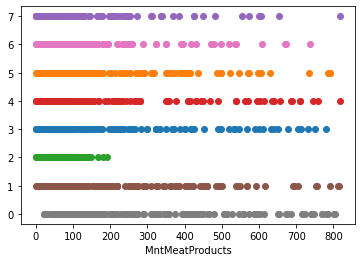

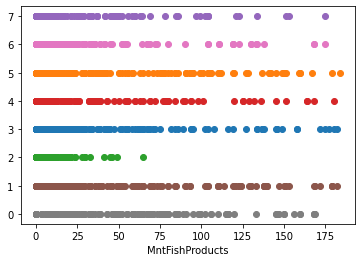

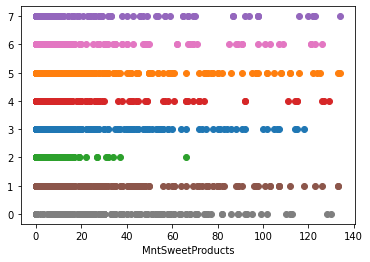

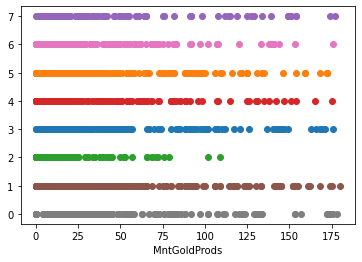

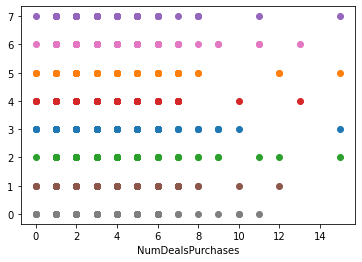

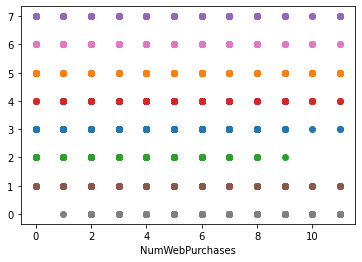

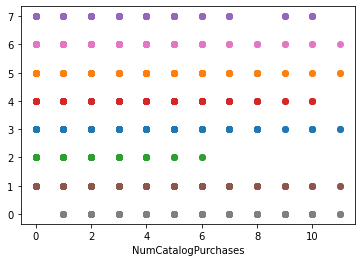

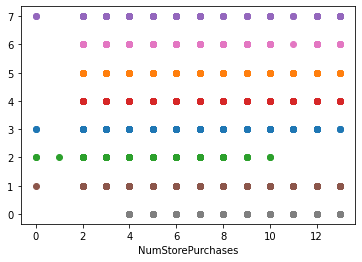

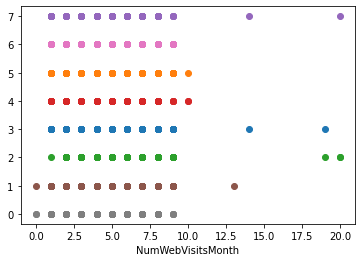

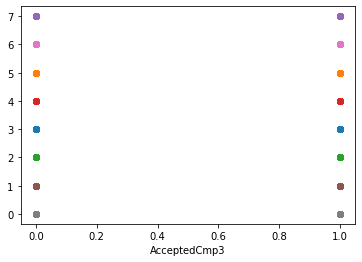

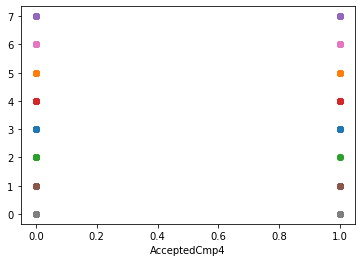

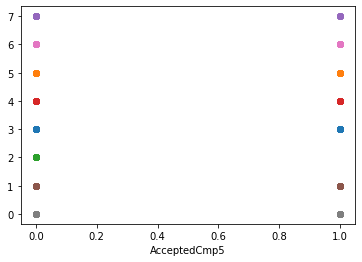

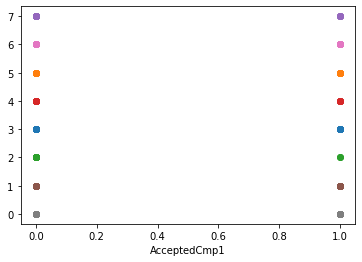

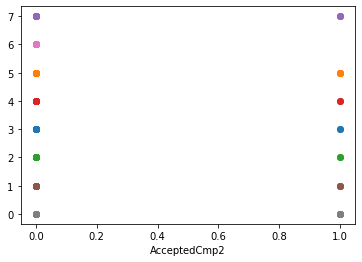

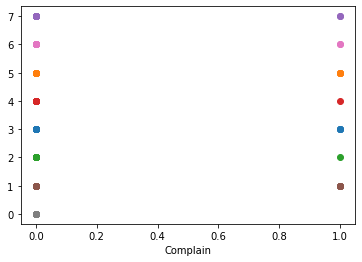

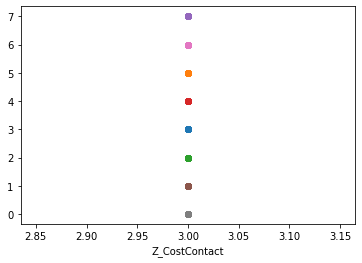

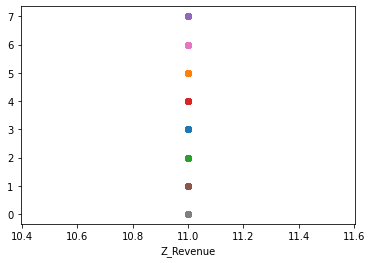

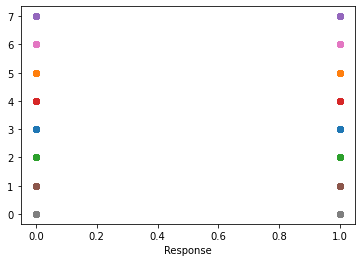

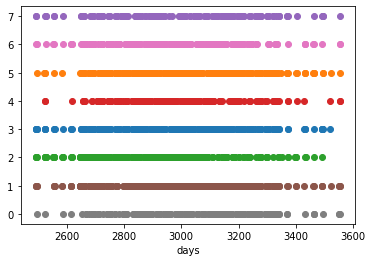

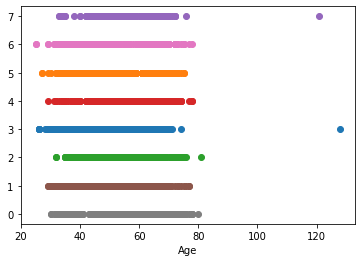

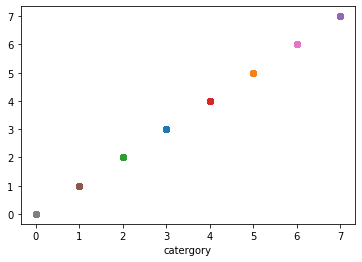

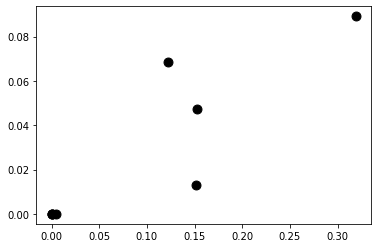

In [210]:
for j in col_ind:
    for i in u_labels:
        plt.scatter(df[df['catergory']==i].iloc[:,j] , df[df['catergory']==i].iloc[:,28] , label = i)
    plt.xlabel(df.columns[j])
    plt.show()
plt.scatter(k_mean.cluster_centers_[:,feature_1] , k_mean.cluster_centers_[:,feature_2] , s = 80, color ='k')

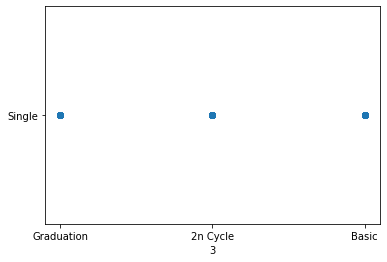

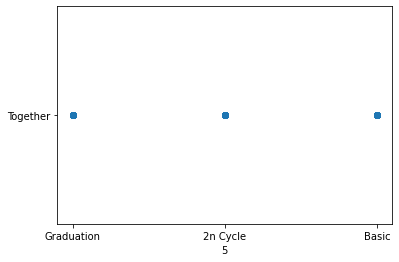

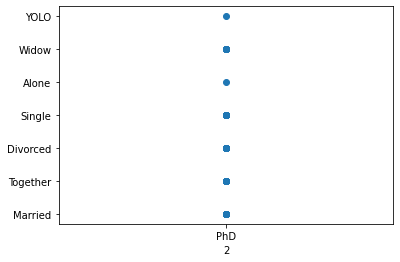

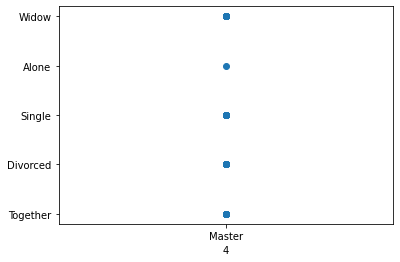

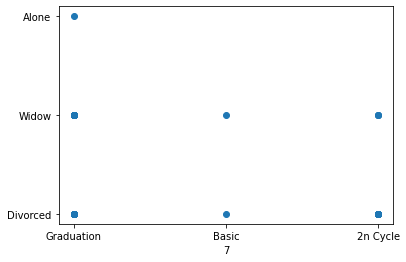

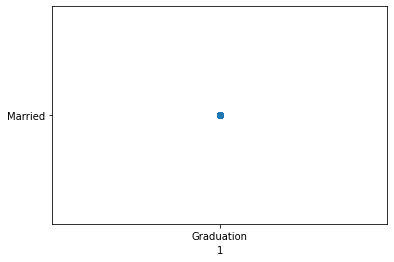

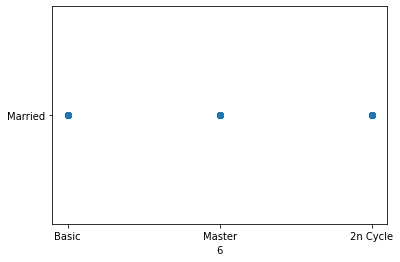

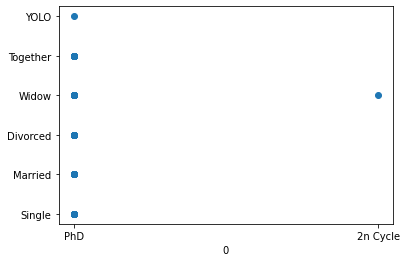

In [241]:

for i in u_labels:
    plt.scatter(df[df['catergory']==i].iloc[:,feature_1] , df[df['catergory']==i].iloc[:,feature_2],label = i)
    plt.xlabel(i)
    plt.show()


In [69]:
df[df['catergory'==1,0]]

KeyError: (False, 0)

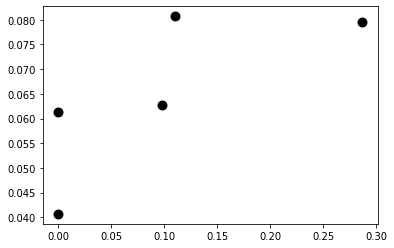

In [88]:
plt.scatter(k_mean.cluster_centers_[:,feature_1] , k_mean.cluster_centers_[:,feature_2] , s = 80, color ='k')

In [54]:
k_mean.cluster_centers_

array([[-1.52655666e-16,  4.51028104e-17,  3.88578059e-16,
         3.05311332e-16,  1.00000000e+00,  2.24215247e-03,
         1.09865471e-01,  3.90134529e-01,  1.97309417e-01,
         2.48878924e-01,  4.70852018e-02,  4.48430493e-03,
         5.16331958e-01,  2.17488789e-01,  3.11659193e-01,
         4.87543597e-01,  2.87097819e-01,  1.18660393e-01,
         1.75891105e-01,  1.26474459e-01,  1.17227763e-01,
         1.55530643e-01,  1.61285501e-01,  3.91969018e-01,
         2.42152466e-01,  4.64125561e-01,  2.73542601e-01,
         8.07174888e-02,  8.29596413e-02,  6.05381166e-02,
         5.60538117e-02,  1.79372197e-02,  2.24215247e-03,
         0.00000000e+00,  0.00000000e+00,  1.90582960e-01,
         4.59675004e-01,  2.91131525e-01],
       [ 1.52542373e-01,  4.74576271e-02,  8.00000000e-01,
         2.49800181e-16, -1.38777878e-16,  1.95156391e-18,
        -8.32667268e-17, -6.10622664e-16,  3.88578059e-16,
         1.00000000e+00, -2.77555756e-17, -8.67361738e-19,
         4.41

In [242]:
from sklearn.metrics import silhouette_score

In [246]:
sil_score = silhouette_score(feed,df['catergory'])
sil_score

0.2087852423168615